# PCA & LDA on MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import pandas as pd

## 1. Train KNN on MNIST Dataset

In [2]:
train_data = datasets.MNIST(root = './data/02/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data/02/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

100%|██████████| 9912422/9912422 [00:00<00:00, 85048514.66it/s]


Extracting ./data/02/MNIST/raw/train-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41988108.78it/s]


Extracting ./data/02/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32015644.20it/s]


Extracting ./data/02/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11566805.57it/s]

Extracting ./data/02/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



number of training data :  60000
number of test data :  10000


In [3]:
# 데이터 모양 확인을 위해 dataframe 형태로 변환

feat_cols = ['pixel'+str(i) for i in range(784)]
df_train = pd.DataFrame(train_data.data.reshape(60000,-1).numpy(), columns = feat_cols)
df_test = pd.DataFrame(test_data.data.reshape(10000,-1).numpy(), columns = feat_cols)

df_train.shape, df_test.shape

((60000, 784), (10000, 784))

In [ ]:
df_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

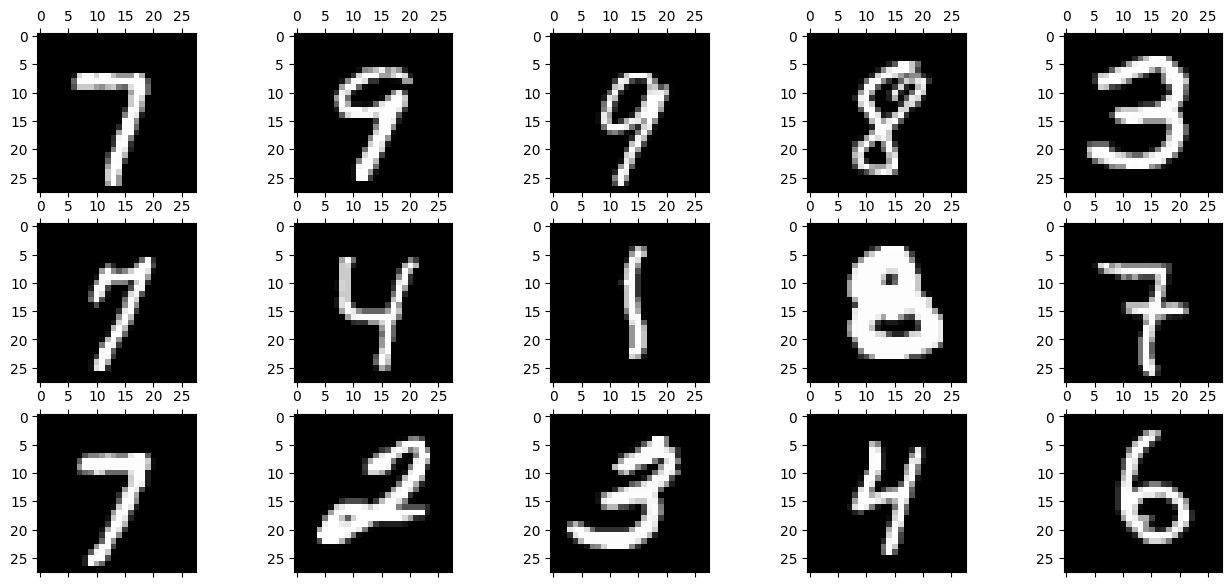

In [ ]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt
import numpy as np

rndperm = np.random.permutation(df_train.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df_train.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [4]:
# 학습 데이터 준비

X_train = train_data.data.reshape(60000,-1).numpy()
y_train = train_data.targets.numpy()

X_test = test_data.data.reshape(10000,-1).numpy()
y_test = test_data.targets.numpy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [5]:
# KNN 학습 - Baseline

from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.030559778213500977


In [6]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  76.5456964969635
0.9688


## 2. PCA & LDA 적용하기

In [ ]:
X_train.shape

(60000, 784)

In [7]:
# PCA 적용

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


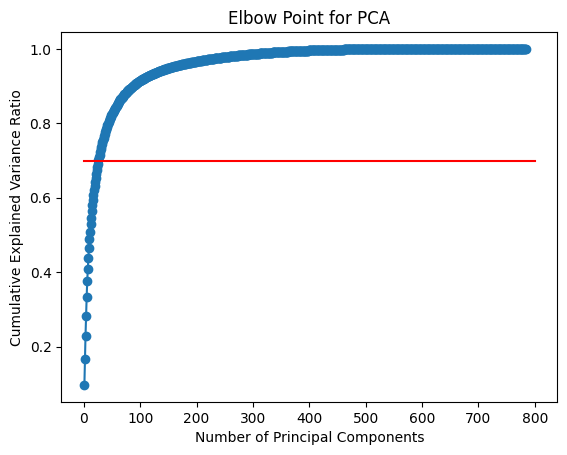

In [ ]:
# 데이터에 PCA 모델 적용
pca = PCA()
pca.fit(X_train)

# 설명된 분산의 비율 추출
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명된 분산의 비율 계산
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 주성분 개수에 따른 누적 설명된 분산의 비율 시각화
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Point for PCA')

# x 값 생성 (예: 0에서 10까지의 값)
x_values = np.linspace(0, 800, 100)

# y 값 생성 (모든 점에서 y가 0.7인 직선)
y_values = np.full_like(x_values, 0.7)
plt.plot(x_values, y_values,color='red')

plt.show()

In [ ]:
np.where(cumulative_variance_ratio == cumulative_variance_ratio[cumulative_variance_ratio > 0.8][0])


(array([43]),)

In [11]:
pca = PCA(n_components=43)

# 데이터에 PCA 모델 적용
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = KNeighborsClassifier(n_neighbors= 5)
clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [9]:
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.9688

In [14]:
pred_pca = clf_pca.predict(X_test_pca) # param # : 784->43

start_time = time.time()
pred = clf.predict(X_test)
print('Fit time : ', time.time() - start_time)
print('Accuracy : ', accuracy_score(pred_pca, y_test))

Fit time :  48.07423186302185
Accuracy :  0.9741


In [17]:
# LDA 적용

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

In [18]:
X_train_lda.shape

(60000, 9)

In [21]:
import numpy as np
np.cumsum(lda.explained_variance_ratio_)

array([0.2392286 , 0.44103854, 0.61953549, 0.72606121, 0.82012832,
       0.88918857, 0.93892603, 0.9732168 , 1.        ])

## 3. 결과 비교하기

In [22]:
# PCA 결과
start_time = time.time()
pred = clf_pca.predict(X_test_pca)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  4.609062910079956
0.9741


In [23]:
# LDA 결과
start_time = time.time()
y_pred = lda.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, y_pred))

Fit time :  0.08087968826293945
0.873


## 4. PCA & LDA 장단점 정리하기

####장단점을 자유롭게 적어주세요!

- PCA
  - 장점: 비지도 학습으로 feature의 특성을 통해 분산을 최대화하는 벡터로 차원을 투영함.
  - 단점: 축소된 차원의 의미 해석이 중요함.

- LDA
  - 장점: pca의 공분산 구조가 아닌 클래스 내 분산을 최소로 하고 클래스 간 분산을 최대로 하는 과정으로 데이터의 특징을 더 잘 나타내서 표현됨.
  - 단점: 가우시안 정규분포 가정일 때만 잘 작동함.